# Project : Examining Factors Responsible for Heart Attacks

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_excel('Healthdata.xlsx')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
df.rename(columns={'cp':'chest_pain_type','trestbps':'resting_blood_pressure','chol':'cholestoral',
                     'fbs':'fasting_blood_sugar','restecg':'resting_electrocardiographic_results',
                     'thalach':'maximum_heart_rate_achieved','exang':'exercise_induced_angina',
                     'oldpeak':'ST.depression(exercise/rest)','ca':'no_of_major_vessels',
                     'thal':'thalassemia'},inplace=True)

In [7]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,ST.depression(exercise/rest),slope,no_of_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## DATA CLEANING

### Perform preliminary data inspection and report the findings as to the structure of the data, missing values, duplicates, etc

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   303 non-null    int64  
 1   sex                                   303 non-null    int64  
 2   chest_pain_type                       303 non-null    int64  
 3   resting_blood_pressure                303 non-null    int64  
 4   cholestoral                           303 non-null    int64  
 5   fasting_blood_sugar                   303 non-null    int64  
 6   resting_electrocardiographic_results  303 non-null    int64  
 7   maximum_heart_rate_achieved           303 non-null    int64  
 8   exercise_induced_angina               303 non-null    int64  
 9   ST.depression(exercise/rest)          303 non-null    float64
 10  slope                                 303 non-null    int64  
 11  no_of_major_vessels

In [9]:
df.isnull().sum()

age                                     0
sex                                     0
chest_pain_type                         0
resting_blood_pressure                  0
cholestoral                             0
fasting_blood_sugar                     0
resting_electrocardiographic_results    0
maximum_heart_rate_achieved             0
exercise_induced_angina                 0
ST.depression(exercise/rest)            0
slope                                   0
no_of_major_vessels                     0
thalassemia                             0
target                                  0
dtype: int64

In [10]:
df.duplicated().sum()

1

In [11]:
df.shape

(303, 14)

### Based on the findings from the previous question remove duplicates (if any) , treat missing values using an appropriate strategy.


In [12]:
df_new=df.drop_duplicates()
df_new.shape

(302, 14)

### Get a preliminary statistical summary of the data. Explore the measures of central tendencies and the spread of the data overall.

In [13]:
df_new.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,ST.depression(exercise/rest),slope,no_of_major_vessels,thalassemia,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [14]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   302 non-null    int64  
 1   sex                                   302 non-null    int64  
 2   chest_pain_type                       302 non-null    int64  
 3   resting_blood_pressure                302 non-null    int64  
 4   cholestoral                           302 non-null    int64  
 5   fasting_blood_sugar                   302 non-null    int64  
 6   resting_electrocardiographic_results  302 non-null    int64  
 7   maximum_heart_rate_achieved           302 non-null    int64  
 8   exercise_induced_angina               302 non-null    int64  
 9   ST.depression(exercise/rest)          302 non-null    float64
 10  slope                                 302 non-null    int64  
 11  no_of_major_vessels

In [15]:
df_new.nunique()

age                                      41
sex                                       2
chest_pain_type                           4
resting_blood_pressure                   49
cholestoral                             152
fasting_blood_sugar                       2
resting_electrocardiographic_results      3
maximum_heart_rate_achieved              91
exercise_induced_angina                   2
ST.depression(exercise/rest)             40
slope                                     3
no_of_major_vessels                       5
thalassemia                               4
target                                    2
dtype: int64

In [16]:
list(enumerate(df_new))

[(0, 'age'),
 (1, 'sex'),
 (2, 'chest_pain_type'),
 (3, 'resting_blood_pressure'),
 (4, 'cholestoral'),
 (5, 'fasting_blood_sugar'),
 (6, 'resting_electrocardiographic_results'),
 (7, 'maximum_heart_rate_achieved'),
 (8, 'exercise_induced_angina'),
 (9, 'ST.depression(exercise/rest)'),
 (10, 'slope'),
 (11, 'no_of_major_vessels'),
 (12, 'thalassemia'),
 (13, 'target')]

In [17]:
Numeric_data=df.iloc[:,[0,3,4,7,9]]
Numeric_data.head()

,age,resting_blood_pressure,cholestoral,maximum_heart_rate_achieved,ST.depression(exercise/rest)
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


In [18]:
Categorical_data=df.iloc[:,[1,2,5,6,8,10,11,12,13]]
Categorical_data.head()

,sex,chest_pain_type,fasting_blood_sugar,resting_electrocardiographic_results,exercise_induced_angina,slope,no_of_major_vessels,thalassemia,target
0,1,3,1,0,0,0,0,1,1
1,1,2,0,1,0,0,0,2,1
2,0,1,0,0,0,2,0,2,1
3,1,1,0,1,0,2,0,2,1
4,0,0,0,1,1,2,0,2,1


In [19]:
Numeric_data.mean()

age                              54.366337
resting_blood_pressure          131.623762
cholestoral                     246.264026
maximum_heart_rate_achieved     149.646865
ST.depression(exercise/rest)      1.039604
dtype: float64

In [20]:
Numeric_data.median()

age                              55.0
resting_blood_pressure          130.0
cholestoral                     240.0
maximum_heart_rate_achieved     153.0
ST.depression(exercise/rest)      0.8
dtype: float64

In [21]:
Numeric_data.mode()

,age,resting_blood_pressure,cholestoral,maximum_heart_rate_achieved,ST.depression(exercise/rest)
0,58.0,120.0,197,162.0,0.0
1,NaN,NaN,204,NaN,NaN
2,NaN,NaN,234,NaN,NaN


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'resting_blood_pressure'}>],
       [<AxesSubplot:title={'center':'cholestoral'}>,
        <AxesSubplot:title={'center':'maximum_heart_rate_achieved'}>],
       [<AxesSubplot:title={'center':'ST.depression(exercise/rest)'}>,
        <AxesSubplot:>]], dtype=object)

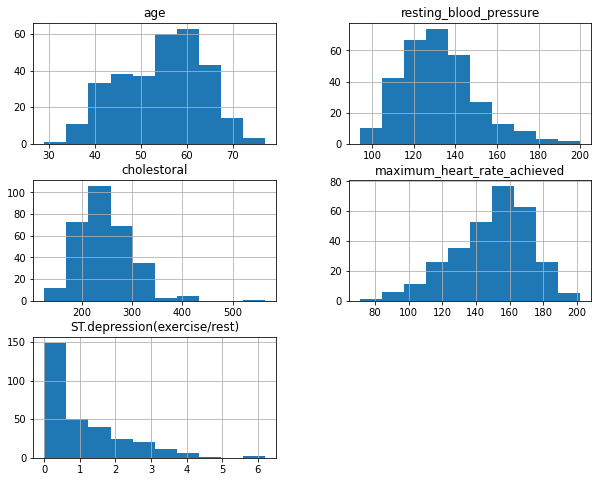

In [22]:
Numeric_data.hist(figsize=(10,8))

#### From above graphs, we observe that:

    1.ST.depression(exercise/rest) is right skewed.
    2.Maximum hear rate achieved is left skewed.
    3.Age,Cholestrol,Resting Blood Pressure is normally distributed.

## Performing EDA and Modeling

### Identify the data variables which might be categorical in nature. Describe and explore these variables using appropriate tools e.g. count plot

In [23]:
list(enumerate(Categorical_data))

[(0, 'sex'),
 (1, 'chest_pain_type'),
 (2, 'fasting_blood_sugar'),
 (3, 'resting_electrocardiographic_results'),
 (4, 'exercise_induced_angina'),
 (5, 'slope'),
 (6, 'no_of_major_vessels'),
 (7, 'thalassemia'),
 (8, 'target')]

C:\Users\sivar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sivar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sivar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sivar\anaconda3\lib\si

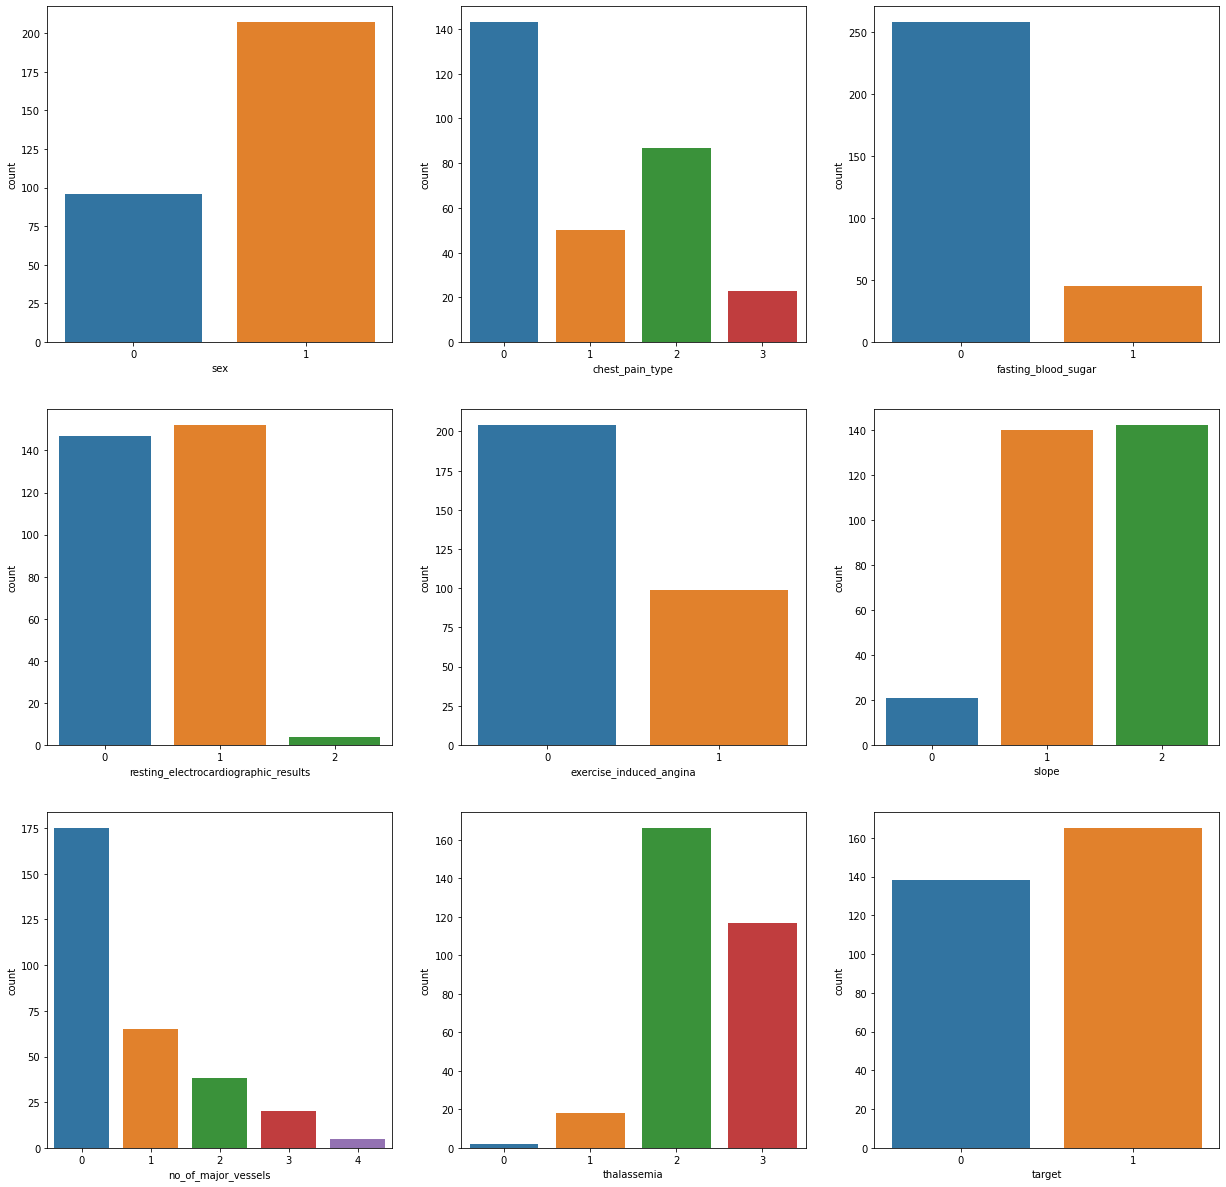

In [24]:
plt.figure(figsize=(21,21))
for i in enumerate(Categorical_data):
    plt.subplot(3,3,i[0]+1)
    sns.countplot(i[1], data =Categorical_data)

### Study the occurrence of CVD across different ages.

In [25]:
df_new.target.value_counts()

1    164
0    138
Name: target, dtype: int64

In [26]:
df1=df_new[df.target==1]

C:\Users\sivar\AppData\Local\Temp\ipykernel_9596\3487242774.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1=df_new[df.target==1]


In [27]:
df1.target.value_counts()

1    164
Name: target, dtype: int64

Text(0.5, 1.0, 'Occurence Of CVD Across Different Ages')

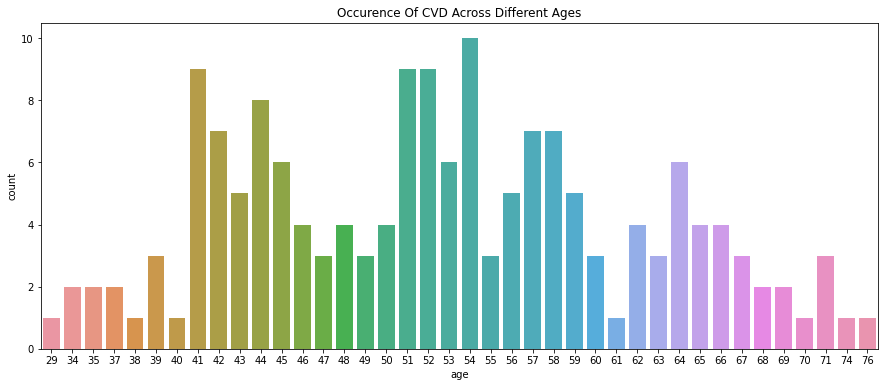

In [28]:
plt.figure(figsize = (15,6))
sns.countplot(x="age",data=df1)
plt.title("Occurence Of CVD Across Different Ages")

We can observe that occurence of disease is more in the age group between 40 to 60, though people of age 50-60 are at more risk

### Can we detect heart attack based on anomalies in resting blood pressure of the patient?

<AxesSubplot:xlabel='target', ylabel='resting_blood_pressure'>

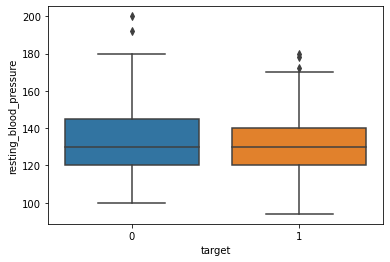

In [29]:
sns.boxplot(y= "resting_blood_pressure", x="target", data=df_new)

From the above observation, there are people who does not got heart attack also have high blood pressure. Therefore, we can not detect heart attack based on resting blood pressure.

### Study the composition of overall patients w.r.t . gender.

Text(0.5, 0, 'Sex: 0 = Female, 1 = Male')

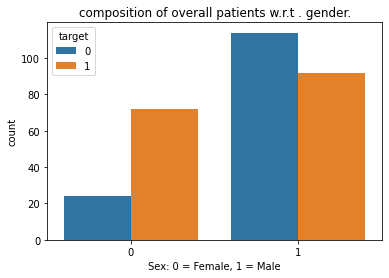

In [30]:
sns.countplot(x="sex",hue="target",data=df_new)
plt.title("composition of overall patients w.r.t . gender.")
plt.xlabel("Sex: 0 = Female, 1 = Male")

From the above graph it can be concluded that male patients are more prone to the Cardiovascular disease. Target = 0 represent Don't have disease, 1 represent have Disease

### Describe the relationship between cholesterol levels and our target variable.

C:\Users\sivar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


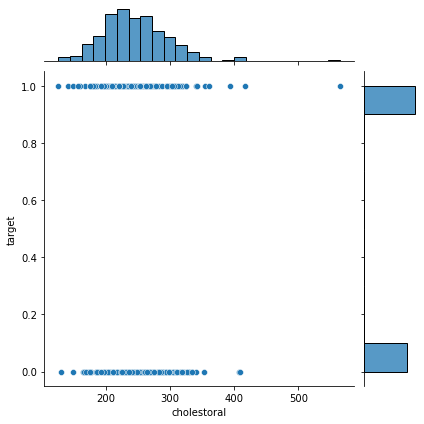

In [31]:
sns.jointplot("cholestoral","target",df_new)

In [32]:
df_new.cholestoral.corr(df_new.target)


-0.08143720051844144

Cholestoral and target variables have weak correlation.

### What can be concluded about the relationship between peak exercising and occurrence of heart attack?

<AxesSubplot:xlabel='slope', ylabel='count'>

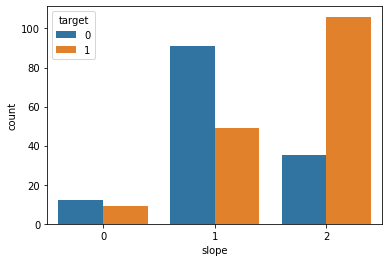

In [33]:
sns.countplot(x="slope",data=df_new,hue="target")

In [34]:
df_new.slope.corr(df_new.target)

0.3439395324893888

People with Downsloping(2) have more people prone to heart attack. Peak exercising is poitively correlated to the target variable.

### Is thalassemia a major cause of CVD? 

<AxesSubplot:xlabel='thalassemia', ylabel='count'>

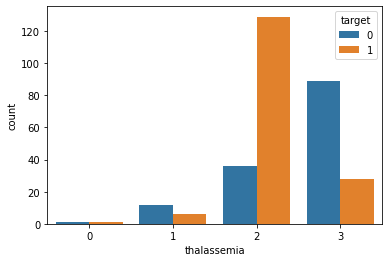

In [35]:
sns.countplot(x="thalassemia",data=df_new, hue= "target")

In [36]:
df_new.thalassemia.corr(df_new.target)

-0.3431007123895653

Thalassemia--0=Null, 1= Normal, 2= Fixed Defect, 3=Reversable defect. People with fixed defect are at higher risk of CVD

### How are the other factors determining the occurrence of CVD?

In [37]:
df2=df_new.drop(columns=["thalassemia","cholestoral","slope"])
df2.corr()

,age,sex,chest_pain_type,resting_blood_pressure,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,ST.depression(exercise/rest),no_of_major_vessels,target
age,1.000000,-0.094962,-0.063107,0.283121,0.119492,-0.111590,-0.395235,0.093216,0.206040,0.302261,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,0.046022,-0.060351,-0.046439,0.143460,0.098322,0.113060,-0.283609
chest_pain_type,-0.063107,-0.051740,1.000000,0.046486,0.096018,0.041561,0.293367,-0.392937,-0.146692,-0.195356,0.432080
resting_blood_pressure,0.283121,-0.057647,0.046486,1.000000,0.178125,-0.115367,-0.048023,0.068526,0.194600,0.099248,-0.146269
fasting_blood_sugar,0.119492,0.046022,0.096018,0.178125,1.000000,-0.083081,-0.007169,0.024729,0.004514,0.144935,-0.026826
resting_electrocardiographic_results,-0.111590,-0.060351,0.041561,-0.115367,-0.083081,1.000000,0.041210,-0.068807,-0.056251,-0.083112,0.134874
maximum_heart_rate_achieved,-0.395235,-0.046439,0.293367,-0.048023,-0.007169,0.041210,1.000000,-0.377411,-0.342201,-0.228311,0.419955
exercise_induced_angina,0.093216,0.143460,-0.392937,0.068526,0.024729,-0.068807,-0.377411,1.000000,0.286766,0.125377,-0.435601
ST.depression(exercise/rest),0.206040,0.098322,-0.146692,0.194600,0.004514,-0.056251,-0.342201,0.286766,1.000000,0.236560,-0.429146
no_of_major_vessels,0.302261,0.113060,-0.195356,0.099248,0.144935,-0.083112,-0.228311,0.125377,0.236560,1.000000,-0.408992


Text(0.5, 1.0, 'other factors determining the occurrence of CVD')

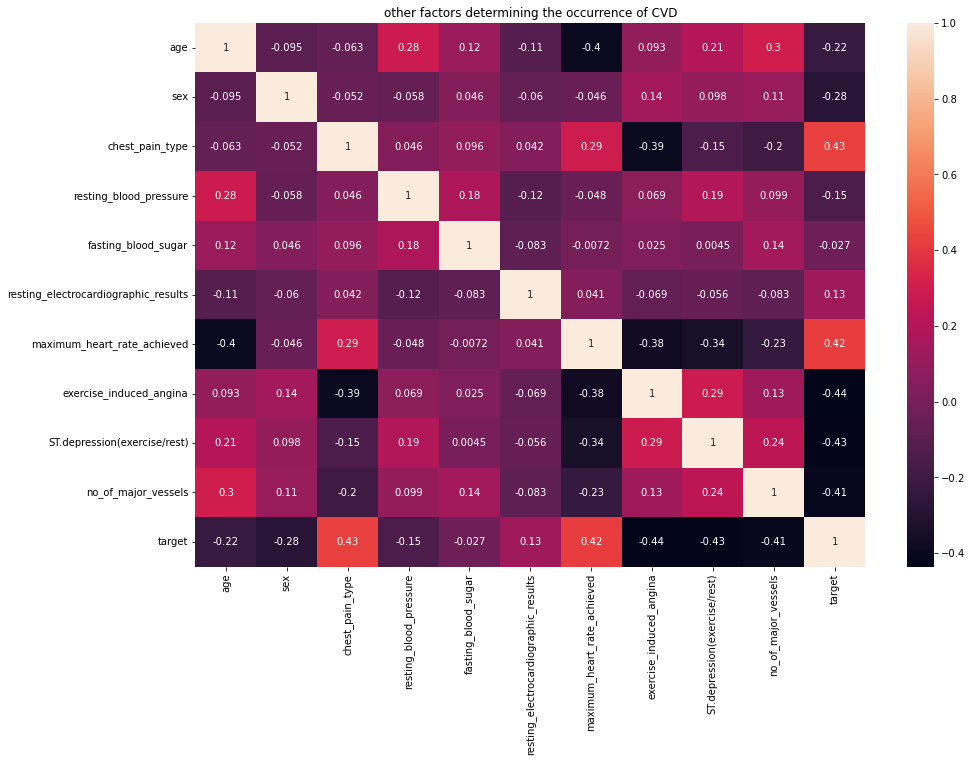

In [38]:
plt.figure(figsize = (15,10))
sns.heatmap(df2.corr(),annot=True)
plt.title("other factors determining the occurrence of CVD")

Chest pain type and maximum heart rate achieved are positively correlated to target, and they are the causes of heart attack, there are no major causes as such.

### Use a pair plot to understand the relationship between all the given variables.

<Figure size 720x576 with 0 Axes>

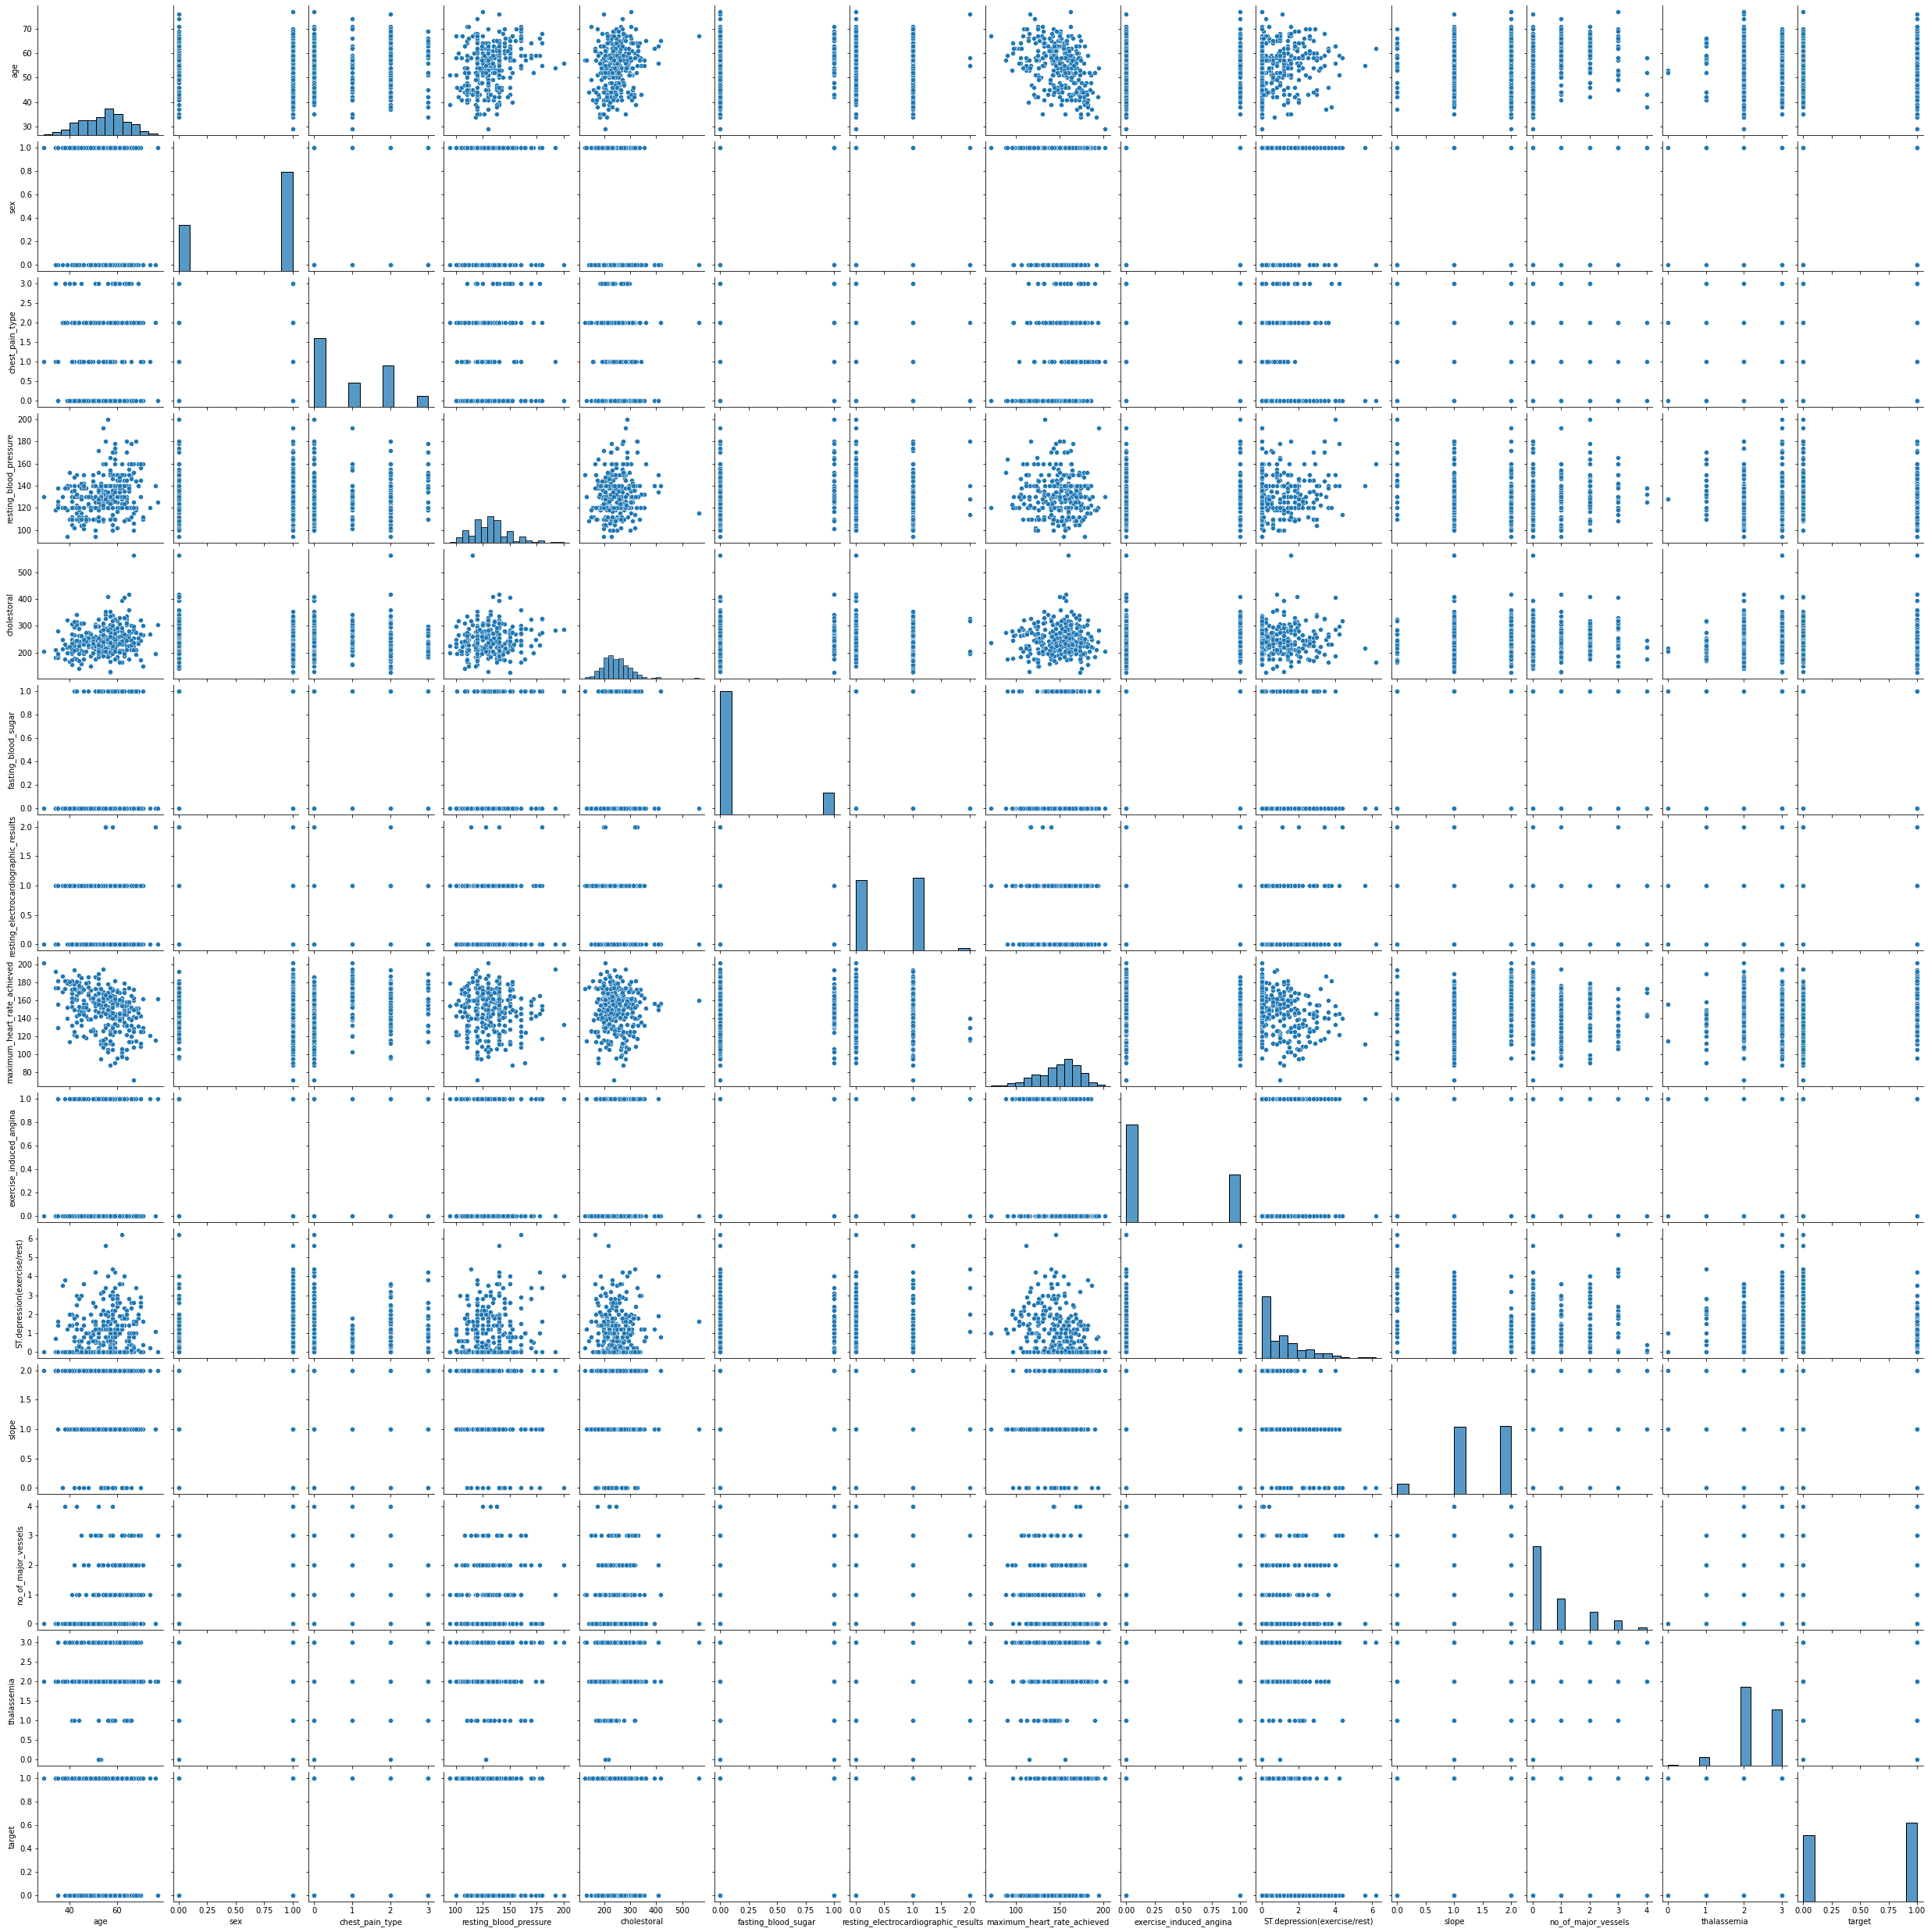

In [39]:
plt.figure(figsize=(10,8))
sns.pairplot(data=df_new)

### Perform logistic regression, predict the outcome for test data, and validate the results by using the confusion matrix.

In [40]:
df_copy=df_new.copy()

In [41]:
df_copy.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,ST.depression(exercise/rest),slope,no_of_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [42]:
X = df_copy.drop(["target"],axis=1)
y = df_copy["target"]

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1234)

In [44]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((241, 13), (61, 13), (241,), (61,))

For training we have 241 data points and for testing we have 61

In [45]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [46]:
log.fit(X_train,y_train)

C:\Users\sivar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
y_pred = log.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0], dtype=int64)

In [48]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,y_pred)

In [49]:
conf_mat

array([[20,  9],
       [ 5, 27]], dtype=int64)

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.69      0.74        29
           1       0.75      0.84      0.79        32

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



Accuracy for the logistic regression model is 77%.

In [51]:
import pickle
pickle.dump(log, open('model_prediction.pkl', 'wb'))

In [52]:
import pickle

def heartattack_prediction(features):
    
    pickled_model = pickle.load(open('model_prediction.pkl', 'rb'))
    target= str(round(list(pickled_model.predict([features]))[0]))
    
    return str("Heart Attack "  + target)

In [54]:
import random
test_features  = list(X_test.iloc[random.randint(0,61),:])
test_features

[51.0, 0.0, 0.0, 130.0, 305.0, 0.0, 1.0, 142.0, 1.0, 1.2, 1.0, 0.0, 3.0]

In [ ]:
heartattack_prediction(test_features)

### Visualize the variables using Tableau to create an understanding for attributes of a Diseased vs. a Healthy person.
https://public.tableau.com/app/profile/sivaranjani.seerangan/viz/capstoneproject_16640538475870/Story1?publish=yes

### Demonstrate  the variables associated with each other and factors to build a dashboard
   https://public.tableau.com/app/profile/sivaranjani.seerangan/viz/Capstoneproject-task2/Dashboard1?publish=yes